# Accessing the Forecasted value of the electrical consumption

## Introduction
The French Electricity Network (RTE) provides a several datasets on the electrical consumption in France. 

Here, we access the forecasted value of the electrical consumption in France. The forecasted value is provided for the next 9 days.

## RTE API

The API used in the [consumption API](https://data.rte-france.com/catalog/-/api/consumption/Consumption/v1.2).

You need an OAuth2 token to access the data. You can get one by the follwoing steps:

1. Create an account
2. Create an application
3. Add the Consumption API to the application
4. On the Application page, open your application
5. Use to button to Copy the _base 64_ encoded string.

## Accessing the data

You can access the data by using the following code. You need to use the base64 encoded string as the `secret` variable.

In [10]:
import pandas as pd
from energy_forecast.consumption_forecast import PredictionForecastAPI

In [12]:
secret_file = "../../.env"
with open(secret_file, "r") as f:
    secret = f.readline().split("=", 1)[1]

In [45]:
prediction_forecast = PredictionForecastAPI(secret=secret)
data = prediction_forecast.get_weekly_forecast(
    start_date=pd.Timestamp.now() - pd.Timedelta(days=2),
)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2024-06-22 00:00:00+02:00 to 2024-06-27 23:30:00+02:00
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   predicted_consumption  288 non-null    int64                    
 1   predicted_at           288 non-null    datetime64[ns, UTC+02:00]
dtypes: datetime64[ns, UTC+02:00](1), int64(1)
memory usage: 6.8 KB


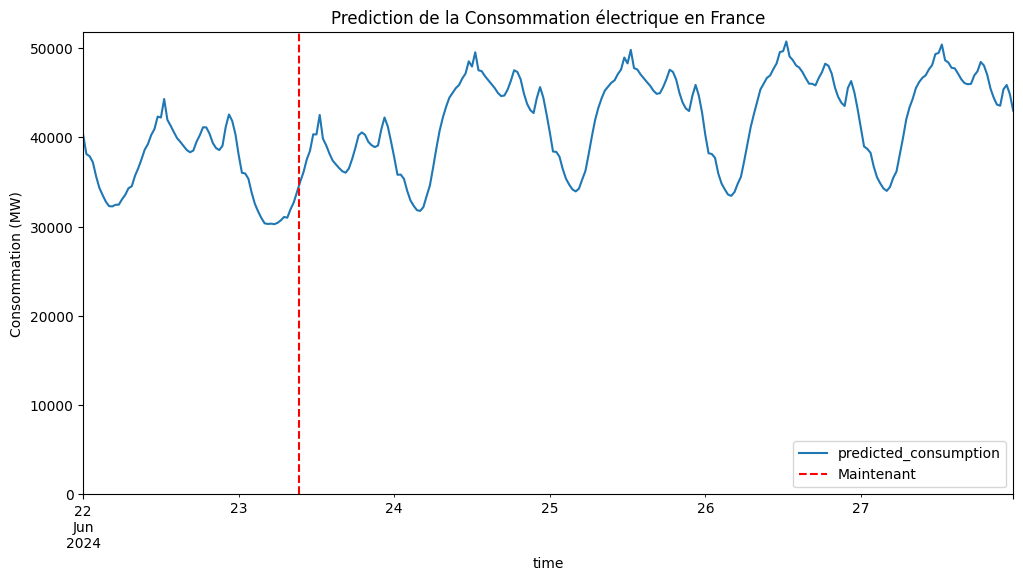

In [49]:
ax = data.plot(y="predicted_consumption", figsize=(12, 6))
ax.set_ylim(0)
ax.set_ylabel("Consommation (MW)")
ax.set_title("Prediction de la Consommation électrique en France")

ax_xpos = pd.Timestamp.now().timestamp() / 60
ax.axvline(ax_xpos, color="red", linestyle="--", label="Maintenant")
ax.legend()

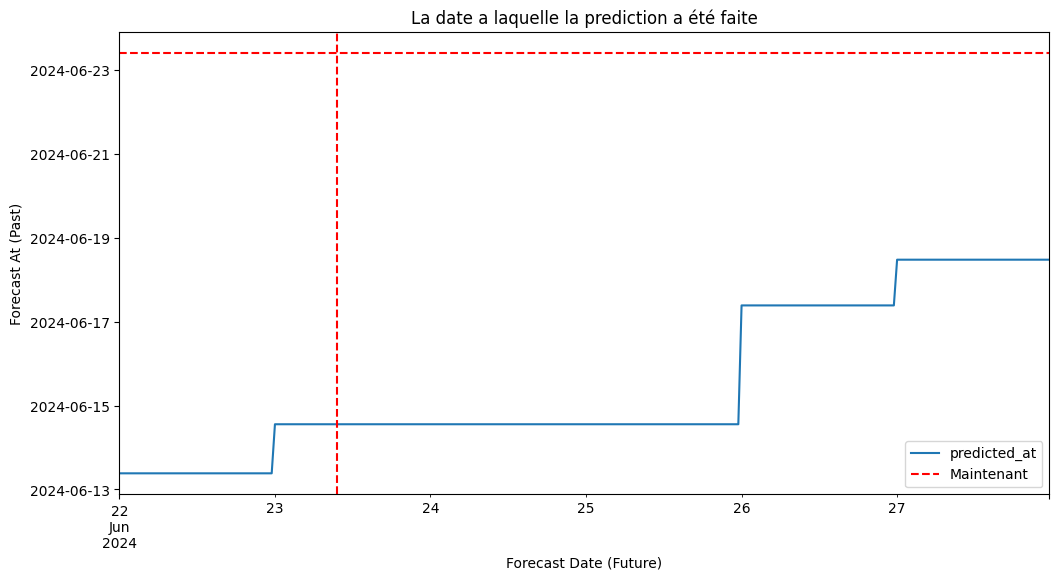

In [70]:
ax = data.plot(y="predicted_at", figsize=(12, 6))
ax.set_ylabel("Forecast At (Past)")
ax.set_xlabel("Forecast Date (Future)")
ax.set_title("La date a laquelle la prediction a été faite")

ax_xpos = pd.Timestamp.now().timestamp() / 60
ax.axvline(ax_xpos, color="red", linestyle="--", label="Maintenant")
ax_ypos = pd.Timestamp.now().timestamp() / 60 / 60 / 24
ax.axhline(ax_ypos, color="red", linestyle="--")
ax.legend()